<a href="https://colab.research.google.com/github/kajanthyS/478Project/blob/main/image_denoising_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import cv2
import os
from skimage import measure
import math
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
from math import log10, sqrt

In [83]:
I = cv2.imread('/lenacolor256.png',0) 

In [84]:
# Add gaussian noise
noisy = random_noise(I, mode='gaussian',var=0.01) 

In [85]:
# Calculating mse
def performance(imageA, imageB):
    input = imageA.astype("float")
    output = imageB.astype("float")
    mse = mean_squared_error(input, output)
    rmse = math.sqrt(mse)

    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / rmse)

    print(f"RMSE value is {rmse} dB")
    print(f"PSNR value is {psnr} dB")

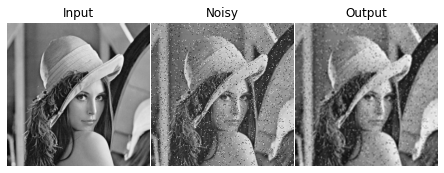

RMSE value is 13.089544745354019 dB
PSNR value is 25.792312767837906 dB


In [92]:
# Apply the mean filter 
output = cv2.boxFilter(noisy,-1,(3,3))
# or use cv2.blur() as shown below
# output = cv2.blur(noisy,(3,3))
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
performance(I,output)

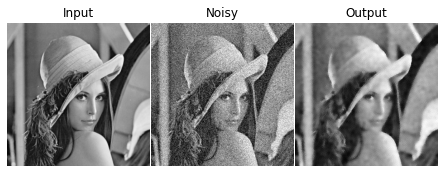

RMSE value is 11.38364894833402 dB
PSNR value is 27.00517372054908 dB


In [88]:
# Apply the bilateral filter 
#Input: 8-bit or floating-point, 1-channel or 3-channel image.
noisy8 = np.asarray(255*noisy, dtype = 'uint8')
output = cv2.bilateralFilter(noisy8,9,75,75)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
performance(I,output)

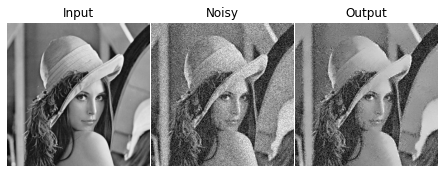

RMSE value is 18.673298111954665 dB
PSNR value is 22.706382996539674 dB


In [89]:
# Apply the nonlocal means filter (Grayscale Image)
noisy_img=cv2.cvtColor(noisy8, cv2.COLOR_GRAY2BGR)
output = cv2.fastNlMeansDenoisingColored(noisy_img,None,10,10,7,21)
output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()

performance(I,output)

In [90]:
#Add salt and pepper noise 
noisy = random_noise(I, mode='s&p',amount=0.05)
# The above function returns a floating-point image on the range [0, 1],
# thus we changed it to 'uint8' and from [0,255]
noisy = np.array(255*noisy, dtype = 'uint8')

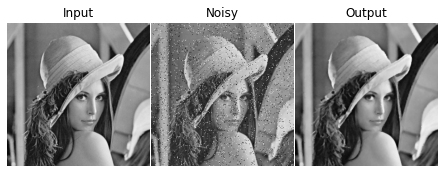

RMSE value is 6.466532304029919 dB
PSNR value is 31.917374579389303 dB


In [91]:
# Apply median filter 
output = cv2.medianBlur(noisy,3)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
performance(I,output)